In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [66]:
data=pd.read_csv('ResumeDataset.csv')
data.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


#Transformations

In [67]:
data.shape

(962, 2)

In [68]:
data['Category'].value_counts()

,count
Category,
Java Developer,84
Testing,70
DevOps Engineer,55
Python Developer,48
Web Designing,45
HR,44
Hadoop,42
Blockchain,40
ETL Developer,40


<Axes: xlabel='count', ylabel='Category'>

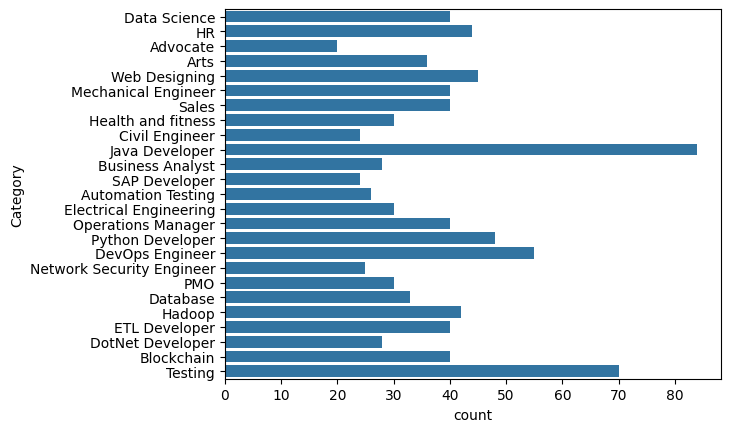

In [69]:
# visualizayion

sns.countplot(data['Category'])


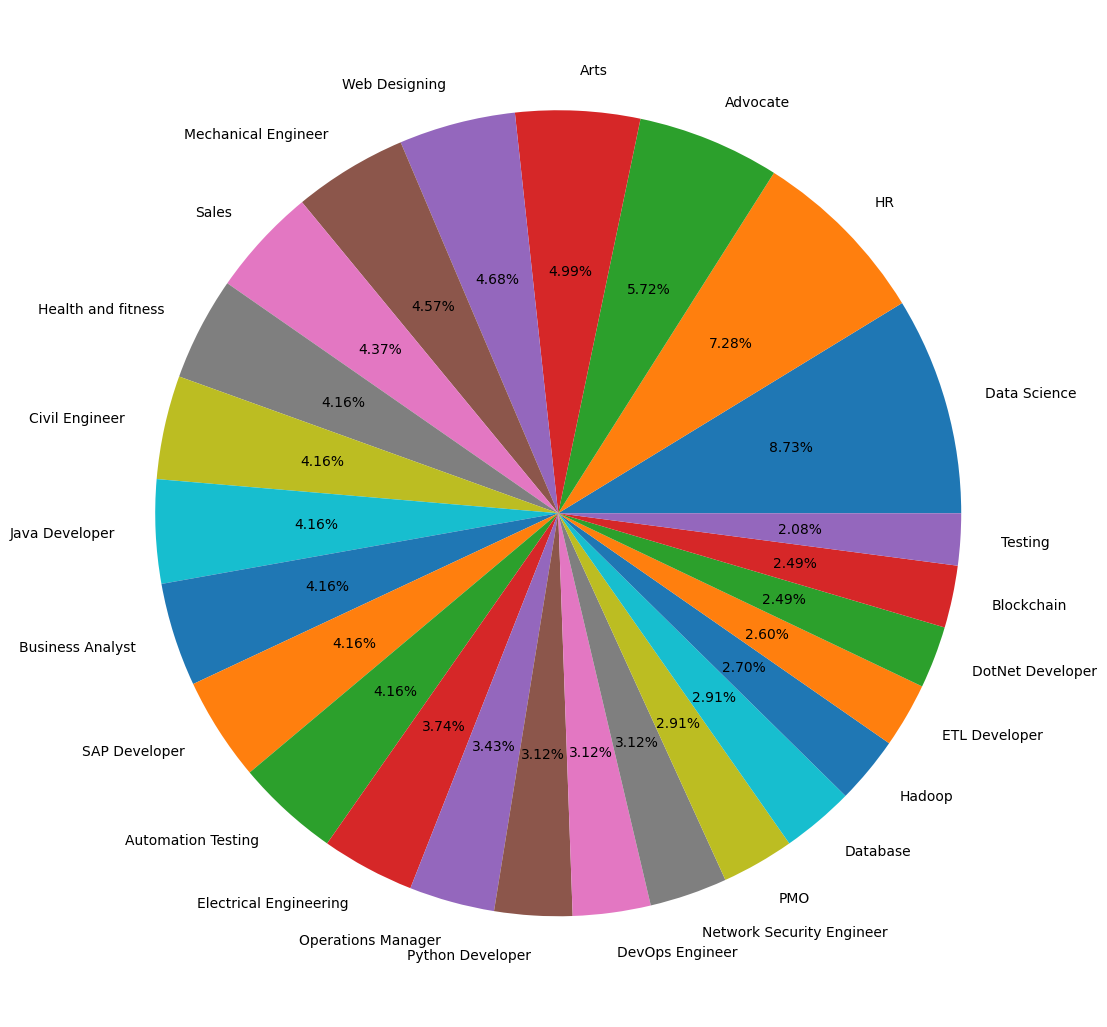

In [70]:
count=data['Category'].value_counts()
label=data['Category'].unique()
plt.figure(figsize=(13,18))
plt.pie(count,labels=label,autopct='%1.2f%%')
plt.show()

In [71]:
data['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [72]:
data['Resume']

,Resume
0,Skills * Programming Languages: Python (pandas...
1,Education Details \r\nMay 2013 to May 2017 B.E...
2,"Areas of Interest Deep Learning, Control Syste..."
3,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...
957,Computer Skills: â¢ Proficient in MS office (...
958,â Willingness to accept the challenges. â ...
959,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [73]:
data['Resume'][3]

"Skills â\x80¢ R â\x80¢ Python â\x80¢ SAP HANA â\x80¢ Tableau â\x80¢ SAP HANA SQL â\x80¢ SAP HANA PAL â\x80¢ MS SQL â\x80¢ SAP Lumira â\x80¢ C# â\x80¢ Linear Programming â\x80¢ Data Modelling â\x80¢ Advance Analytics â\x80¢ SCM Analytics â\x80¢ Retail Analytics â\x80¢Social Media Analytics â\x80¢ NLP Education Details \r\nJanuary 2017 to January 2018 PGDM Business Analytics  Great Lakes Institute of Management & Illinois Institute of Technology\r\nJanuary 2013 Bachelor of Engineering Electronics and Communication Bengaluru, Karnataka New Horizon College of Engineering, Bangalore Visvesvaraya Technological University\r\nData Science Consultant \r\n\r\nConsultant - Deloitte USI\r\nSkill Details \r\nLINEAR PROGRAMMING- Exprience - 6 months\r\nRETAIL- Exprience - 6 months\r\nRETAIL MARKETING- Exprience - 6 months\r\nSCM- Exprience - 6 months\r\nSQL- Exprience - Less than 1 year months\r\nDeep Learning- Exprience - Less than 1 year months\r\nMachine learning- Exprience - Less than 1 year mo

# Data Cleaning
##### urls
##### hashtags
##### mentions
##### special letters
##### punctuation

In [74]:
import re

def cleanResume(txt):
    cleantxt = re.sub('https\S+\s', " ", txt)  # remove hhtps
    cleantxt = re.sub('@\S+', " ", cleantxt)   # remove @
    cleantxt = re.sub('#\S+', " ", cleantxt)   # remove #
    cleantxt = re.sub('RT|cc', " ", cleantxt)  # remove rt, cc
    cleantxt = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), " ", cleantxt) # all punctuation & special chara
    cleantxt = re.sub('\s+', " ", cleantxt) # remove multiple space with single space
    cleantxt = re.sub('\n', " ", cleantxt)   # remove newline
    cleantxt = re.sub(r'[^\x00-\x7f]', " ", cleantxt)  # remove ASCII

    return cleantxt


In [75]:
data['Resume']=data['Resume'].apply(lambda x:cleanResume(x))

In [76]:
data['Resume']

,Resume
0,Skills Programming Languages Python pandas num...
1,Education Details May 2013 to May 2017 B E UIT...
2,Areas of Interest Deep Learning Control System...
3,Skills R Python SAP HANA Table...
4,Education Details MCA YMCAUST Faridabad Haryan...
...,...
957,Computer Skills Proficient in MS office Wo...
958,Willingness to a ept the challenges Po...
959,PERSONAL SKILLS Quick learner Eagernes...
960,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


# word to number

In [77]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(data['Category'])

LabelEncoder()

In [78]:
data['Category']=le.transform(data['Category'])

In [79]:
data['Category'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

# Vectorization

In [81]:
# resume column

from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
tf.fit(data['Resume'])

TfidfVectorizer()

In [83]:
required=tf.transform(data['Resume'])

# train test split

In [90]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(required,data['Category'],test_size=0.2,random_state=42)

In [91]:
x_test.shape , x_train.shape

((193, 7569), (769, 7569))

# Model selection

In [94]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define the classifiers to evaluate
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Classifier": SVC(),
    "Naive Bayes": MultinomialNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
}

# Initialize a list to store results
results = []

# Loop through each classifier, train it, and evaluate it
for name, clf in classifiers.items():
    print(f"Training and evaluating: {name}")

    # Train the model
    clf.fit(x_train, y_train)

    # Make predictions
    y_pred = clf.predict(x_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    # Extract metrics for the positive class (assumed to be '1')
    precision = report['1']['precision']
    recall = report['1']['recall']
    f1_score = report['1']['f1-score']

    # Append results to the list
    results.append({
        "Classifier": name,
        "Accuracy": accuracy*100,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1_score
    })

# Convert the results to a DataFrame
results_df = pd.DataFrame(results)

# Sort the table by accuracy in descending order
results_df = results_df.sort_values(by="Accuracy", ascending=False)

# Display the results table
print("\nClassification Results:")
print(results_df)


Training and evaluating: Logistic Regression
Training and evaluating: Decision Tree
Training and evaluating: Random Forest
Training and evaluating: Gradient Boosting
Training and evaluating: Support Vector Classifier
Training and evaluating: Naive Bayes
Training and evaluating: K-Nearest Neighbors

Classification Results:
                  Classifier    Accuracy  Precision  Recall  F1-Score
3          Gradient Boosting  100.000000        1.0     1.0       1.0
0        Logistic Regression   99.481865        1.0     1.0       1.0
1              Decision Tree   99.481865        1.0     1.0       1.0
4  Support Vector Classifier   99.481865        1.0     1.0       1.0
2              Random Forest   98.445596        1.0     1.0       1.0
6        K-Nearest Neighbors   98.445596        1.0     1.0       1.0
5                Naive Bayes   93.264249        1.0     1.0       1.0
